# Heart Data Analysis
Heart disease analysis from : https://www.kaggle.com/ronitf/heart-disease-uci <br>
Going to use: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets as guideline<br>
## Setup:

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler


# import warnings
# warnings.filterwarnings("ignore")


df=pd.read_csv('Data/heart.csv')


## Data vizualization:

In [30]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataframe doesn't have null values and have some values that need to be normalized like: ['age', 'trestbps', 'chol', 'thalach'] since their values are from 10 to 100 higher than the ones from another columns. The target values mean is 0.54 so it is not a very uneven dataset

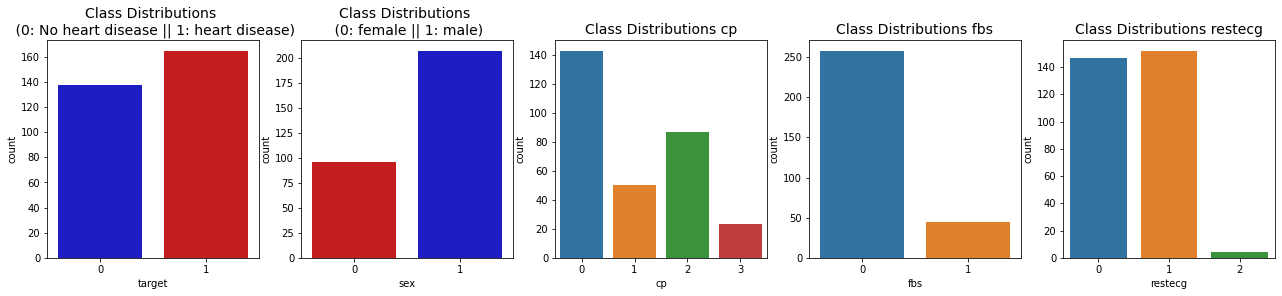

In [33]:
fig, ax = plt.subplots(1, 5, figsize=(22,4))

colors1 = ["#0101DF", "#DF0101"]
sns.countplot('target', data=df, ax=ax[0], palette=colors1)
ax[0].set_title('Class Distributions \n (0: No heart disease || 1: heart disease)', fontsize=14)

colors2 = ["#DF0101","#0101DF"]
sns.countplot('sex', data=df,ax=ax[1], palette=colors2)
ax[1].set_title('Class Distributions \n (0: female || 1: male)', fontsize=14)

sns.countplot('cp', data=df,ax=ax[2])
ax[2].set_title('Class Distributions cp', fontsize=14)

sns.countplot('fbs', data=df,ax=ax[3])
ax[3].set_title('Class Distributions fbs', fontsize=14)

sns.countplot('restecg', data=df,ax=ax[4])
ax[4].set_title('Class Distributions restecg', fontsize=14)

plt.show()

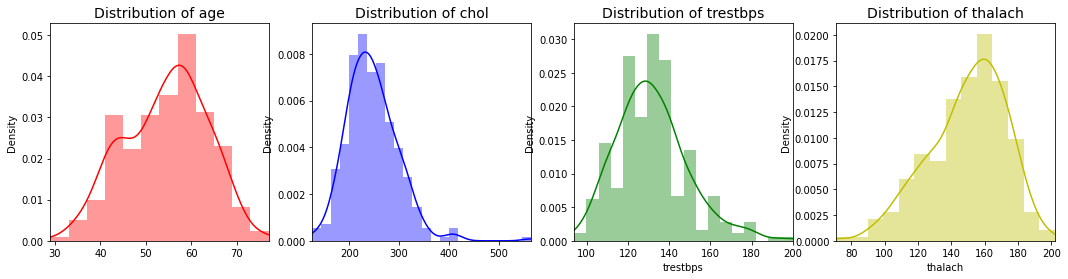

In [34]:
#distribution plots
fig, ax = plt.subplots(1, 4, figsize=(18,4))

age_val = df['age'].values
chol_val = df['chol'].values
trestbps_val=df['trestbps']
thalach_val=df['thalach']

sns.distplot(age_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of age', fontsize=14)
ax[0].set_xlim([min(age_val), max(age_val)])

sns.distplot(chol_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of chol', fontsize=14)
ax[1].set_xlim([min(chol_val), max(chol_val)])

sns.distplot(trestbps_val, ax=ax[2], color='g')
ax[2].set_title('Distribution of trestbps', fontsize=14)
ax[2].set_xlim([min(trestbps_val), max(trestbps_val)])


sns.distplot(thalach_val, ax=ax[3], color='y')
ax[3].set_title('Distribution of thalach', fontsize=14)
ax[3].set_xlim([min(thalach_val), max(thalach_val)])


plt.show()

In [35]:
rob_scaler = RobustScaler()

df['scaled_age'] = rob_scaler.fit_transform(df['age'].values.reshape(-1,1))
df['scaled_trestbps'] = rob_scaler.fit_transform(df['trestbps'].values.reshape(-1,1))
df['scaled_thalach'] = rob_scaler.fit_transform(df['thalach'].values.reshape(-1,1))
df['scaled_chol'] = rob_scaler.fit_transform(df['chol'].values.reshape(-1,1))

df.drop(['age', 'trestbps', 'chol', 'thalach'], axis=1, inplace=True)

In [36]:
df.head(5)

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,scaled_age,scaled_trestbps,scaled_thalach,scaled_chol
0,1,3,1,0,0,2.3,0,0,1,1,0.592593,0.75,-0.092308,-0.110236
1,1,2,0,1,0,3.5,0,0,2,1,-1.333333,0.00,1.046154,0.157480
2,0,1,0,0,0,1.4,2,0,2,1,-1.037037,0.00,0.584615,-0.566929
3,1,1,0,1,0,0.8,2,0,2,1,0.074074,-0.50,0.769231,-0.062992
4,0,0,0,1,1,0.6,2,0,2,1,0.148148,-0.50,0.307692,1.795276


## Correlation matrix

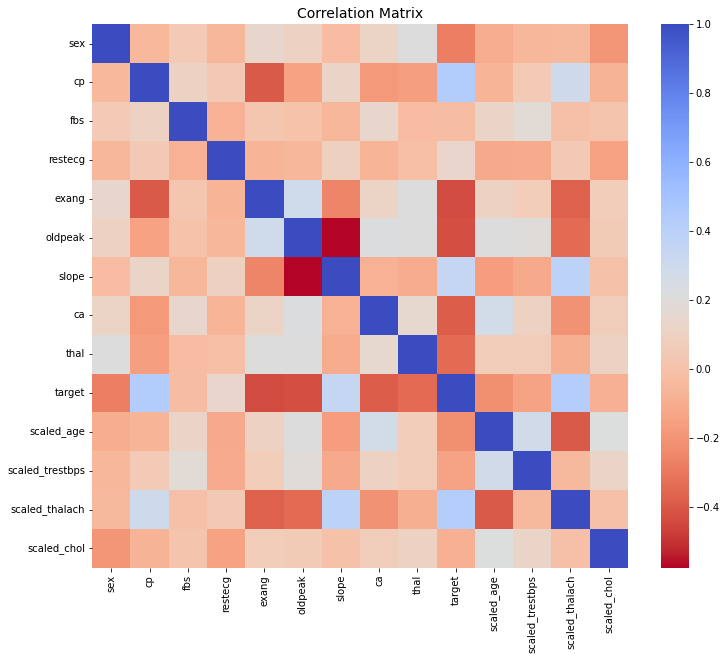

In [43]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix', fontsize=14)

plt.show()

['cp','thalach','slope'] -> more positive correlation -> the higher the value the risk of a heart disease becomes higher <br>
['exang','oldpeak','ca'] -> more negative correlation -> the lower the value the risk of a heart disease becomes higher <br>

## boxplots

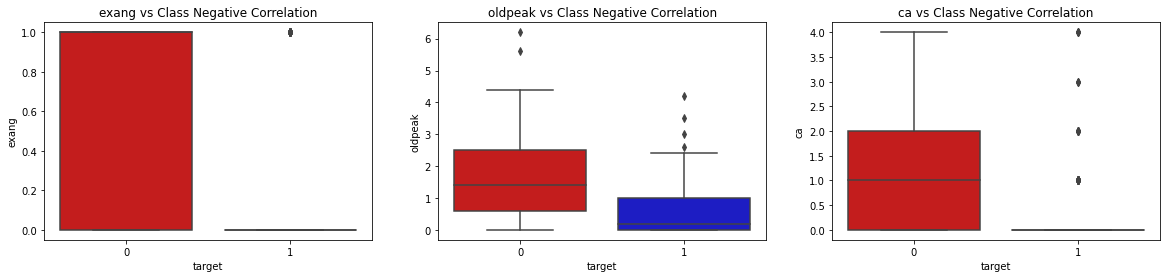

In [44]:
negative_correlations=['exang','oldpeak','ca']
f, axes = plt.subplots(ncols=len(negative_correlations), figsize=(20,4))
cont=0
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
for correlation in negative_correlations:
    sns.boxplot(x="target", y=correlation, data=df, palette=colors, ax=axes[cont])
    text=correlation+' vs Class Negative Correlation'
    axes[cont].set_title(text)
    cont=cont+1



plt.show()

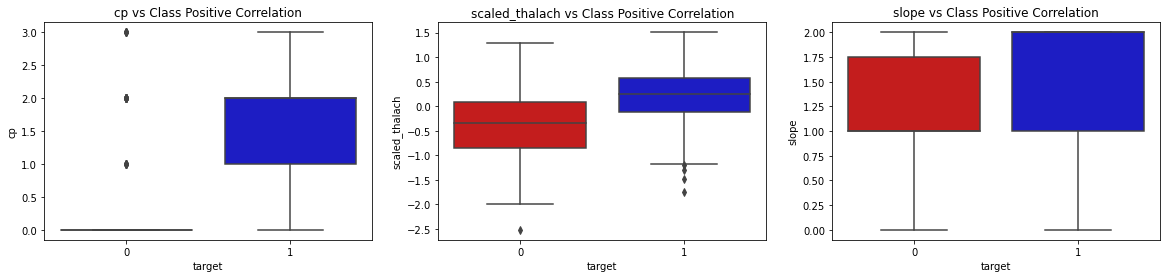

In [45]:
positive_correlations=['cp','scaled_thalach','slope']
f, axes = plt.subplots(ncols=len(positive_correlations), figsize=(20,4))
cont=0
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
for correlation in positive_correlations:
    sns.boxplot(x="target", y=correlation, data=df, palette=colors, ax=axes[cont])
    text=correlation+' vs Class Positive Correlation'
    axes[cont].set_title(text)
    cont=cont+1



plt.show()